# 本周内容的概括：
 - 有监督的学习
 - 

# 1. 决策树


例子：
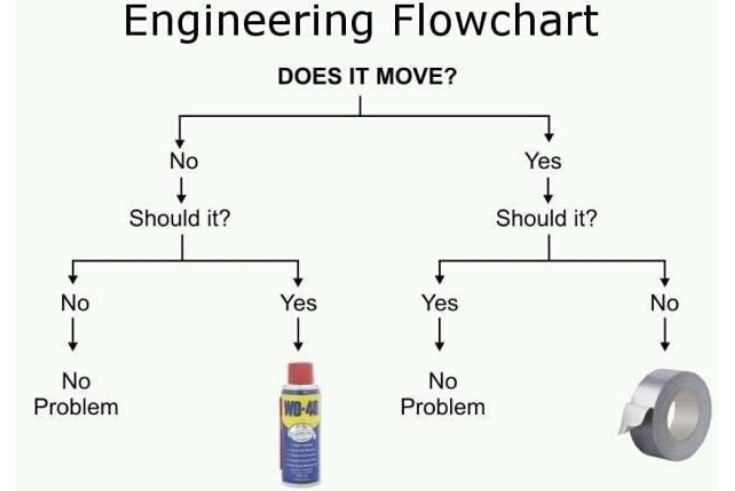

> 实质：
> 
> - 决策树的实质就是在不同的时候问不同的问题
> 
> - 也算是一种特殊的表，即node的结合

> 特点：
>
> - 作为树，其每个节点都只有一个输入edge
>
> - 每个节点代表一次check
>
> - 每次check都是对label的一次检查
>
> - 叶子节点就代表一个结果

> 怎么用肉眼构建决策树？
>
> - 他没有提供统一的方法论，我的总结：
> - 挨个看所有标签，看标签能不能把数据分成一组纯的一组杂的，直到两组都是纯的为止

> 如何提升泛化能力？
> - 节点数量越少越好 

> 如何建构决策树？
>
> - 目标：用训练数据找到一个尽可能小的树
>
> - 指导思想：把“分类效果最显著”的点放在靠近根的位置。

> 怎么衡量分类效果的高低？
>
> - 香农熵
>
> $\begin{equation} H(X) = -\sum\limits_{X}p(x)log(p(x)) \end{equation}$
>
> - 香农熵对于二元分类问题，可以简化为：
> $\begin{equation}B(q)=-(q log_{2}q+(1-q)log_{2}(1-q))\end{equation}$
>
> 如果数据集对于你的终极目标问题有`p`个pos数据，`n`个nega数据，那你的分类终极目标所需要的总熵为：
> $H(Goal) = B(\frac{p}{p+n})$
>
> 每个问题都会提供$H(goal)$的一部分，这就引出了information gain的问题：

In [7]:
import math

def B(q): # q = p/(p+n)
    return -(q*math.log2(q)+(1-q)*math.log2(1-q))

print(B(0.5))

1.0


> information gain:
>
> - 一个问题`A`把数据集分成d个组，每个组有两部分：$p_k$个pos点和$n_k$个neg点。 此处的p和n都是对于终极问题的p和n
> - 那在经过问题`A`之后，剩余（Remainder）的熵为：
> $\begin{equation}\begin{align} Remainder(A) &= \sum\limits^{d}_{k=1}\frac{p_k+n_k}{p+n}B\left(\frac{p_k}{p_k+n_k}\right)\\
&= \sum\limits^{对中间问题分出来的所有组：} \frac{分到这组里的数据数}{进入这个问题前的总数据数}B\left(\frac{终极问题的p}{分进这组的所有}\right)
 \end{align}\end{equation}$
>
> 
>
> - 那gain怎么算呢？
> $\begin{equation} Gain(A)=B\left(\frac{p}{p+n}\right)-Remainder(A) \end{equation}$

> 计算例子：
>
> - 我的终极问题会把数据平分，也就意味着目标是$B(0.5)=1 bit$
>
> - 现在来了一个中间问题，他把`8`个数据点分成两组：
> 
>     - 对中间问题`positive`的：2个终极n
>     - 对中间问题`negative`的：2个终级n，四个终极p
>
>     - 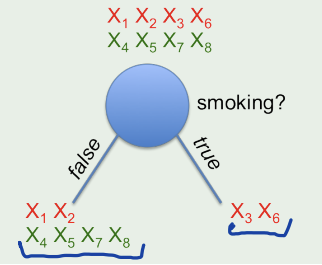
>
> 根据上述公式计算：
>  $Remainder = \frac{2}{8}B(1)+\frac{6}{8}B\left(\frac{2}{6}\right)\approx0.689 bits$
>
>  - $\frac{2}{8}$：经过此中间问题之后，其中一组(右)内含`8`个数据点中的`2`个
>  - $B(1)$: 这个两人的组里全都是终极p，$\frac{2}{2+0}=1$
>  - $\frac{6}{8}$: 此中间问题分出的第二组(左)中含`8`个数据点里的`6`个
>  - $B(\frac{2}{6})$: $\frac{2个终极p（红色）}{组内总数6个}$
>
> 那么，$Gain(此问题) = 1-0.689=0.311 bits$
> 